In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import statsmodels.api as sm

from utils import *

%load_ext autoreload
%autoreload 2


# load in 

In [32]:
DATA_PATH = Path("/Users/jessbreda/Desktop/github/ca-sdoh/data")

cols_of_interest = [
    "hospital_ownership",
    "avg_payment_amount_py",
    "average_hcc_beneficiary_risk_score",
    "socioeconomic_status_sum",
    "hh_characteristics_sum",
    "minority_status_sum",
    "housing_status_sum",
    "series_themes_sum",
    "overall_hosp_linear_mean_value",
    "patient_safety_score",
    "number_of_readmissions",
    "number_of_discharges",
    "condition_name",
    "avg_number_beneficiaries_medicare_medicaid_py",
    "pct_beneficiaries_congestive_heart_failure",
    "number_black_beneficiaries",
]

df = pd.read_csv(
    (DATA_PATH / "obt_slim.csv"),
    usecols=cols_of_interest,
)

# drop nans & rows with -999 (the nan equivalent in the sdoh data)
df.dropna(inplace=True)
df = df[df != -999].dropna()

# remaking readmission rate because it was an int, should be a float w/ decimals
df["readmission_rate"] = (
    df["number_of_readmissions"] / df["number_of_discharges"]
) * 100
df.drop(columns=["number_of_readmissions", "number_of_discharges"], inplace=True)

df["number_dual_log_transformed"] = np.log10(
    df["avg_number_beneficiaries_medicare_medicaid_py"]
)

<Axes: xlabel='number_dual_log_transformed', ylabel='readmission_rate'>

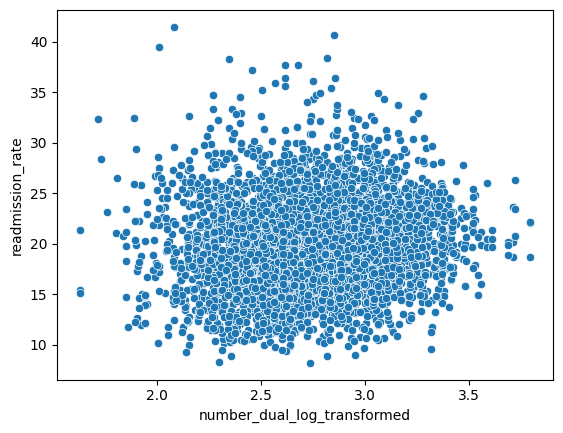

In [33]:
sns.scatterplot(data=df, x="number_dual_log_transformed", y="readmission_rate")

<Axes: xlabel='number_dual_log_transformed', ylabel='socioeconomic_status_sum'>

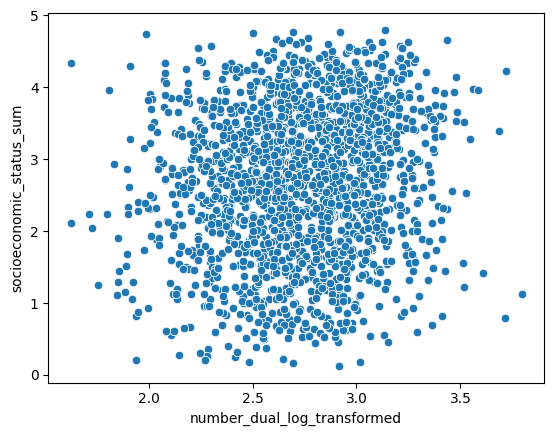

In [34]:
sns.scatterplot(data=df, x="number_dual_log_transformed", y="socioeconomic_status_sum")

<Axes: >

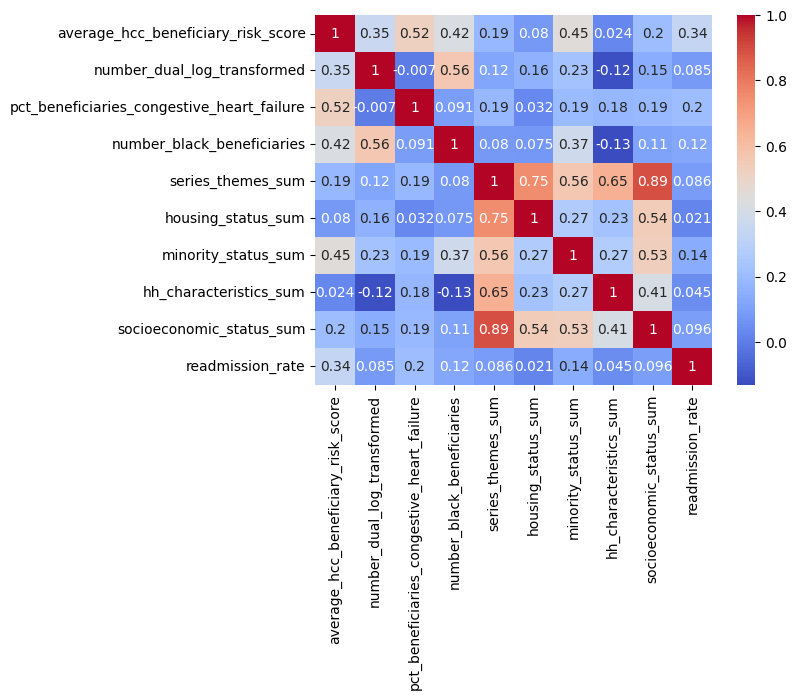

In [35]:
cols_of_interest = [
    "average_hcc_beneficiary_risk_score",
    "number_dual_log_transformed",
    "pct_beneficiaries_congestive_heart_failure",
    "number_black_beneficiaries",
    "series_themes_sum",
    "housing_status_sum",
    "minority_status_sum",
    "hh_characteristics_sum",
    "socioeconomic_status_sum",
    "readmission_rate",
]

X = df[cols_of_interest]
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(numerical_features_scaled, columns=X.columns)

correlation_mat = X_scaled.corr()
sns.heatmap(correlation_mat, annot=True, cmap="coolwarm")

In [41]:
f_name = "patient_mix.csv"
pm = pd.read_csv(DATA_PATH / f_name)

pm.columns

pm.drop(
    columns=[
        "year",
        "facility_id",
        "facility_name",
        "address",
        "city",
        "zip_code",
        "state",
        "total_covered_charges",
        "total_payment_amount",
        "total_medicare_payment_amount",
        "total_discharges",
        "total_medicare_beneficiaries",
        "total_covered_days",
        "total_days",
    ],
    inplace=True,
)

<Axes: >

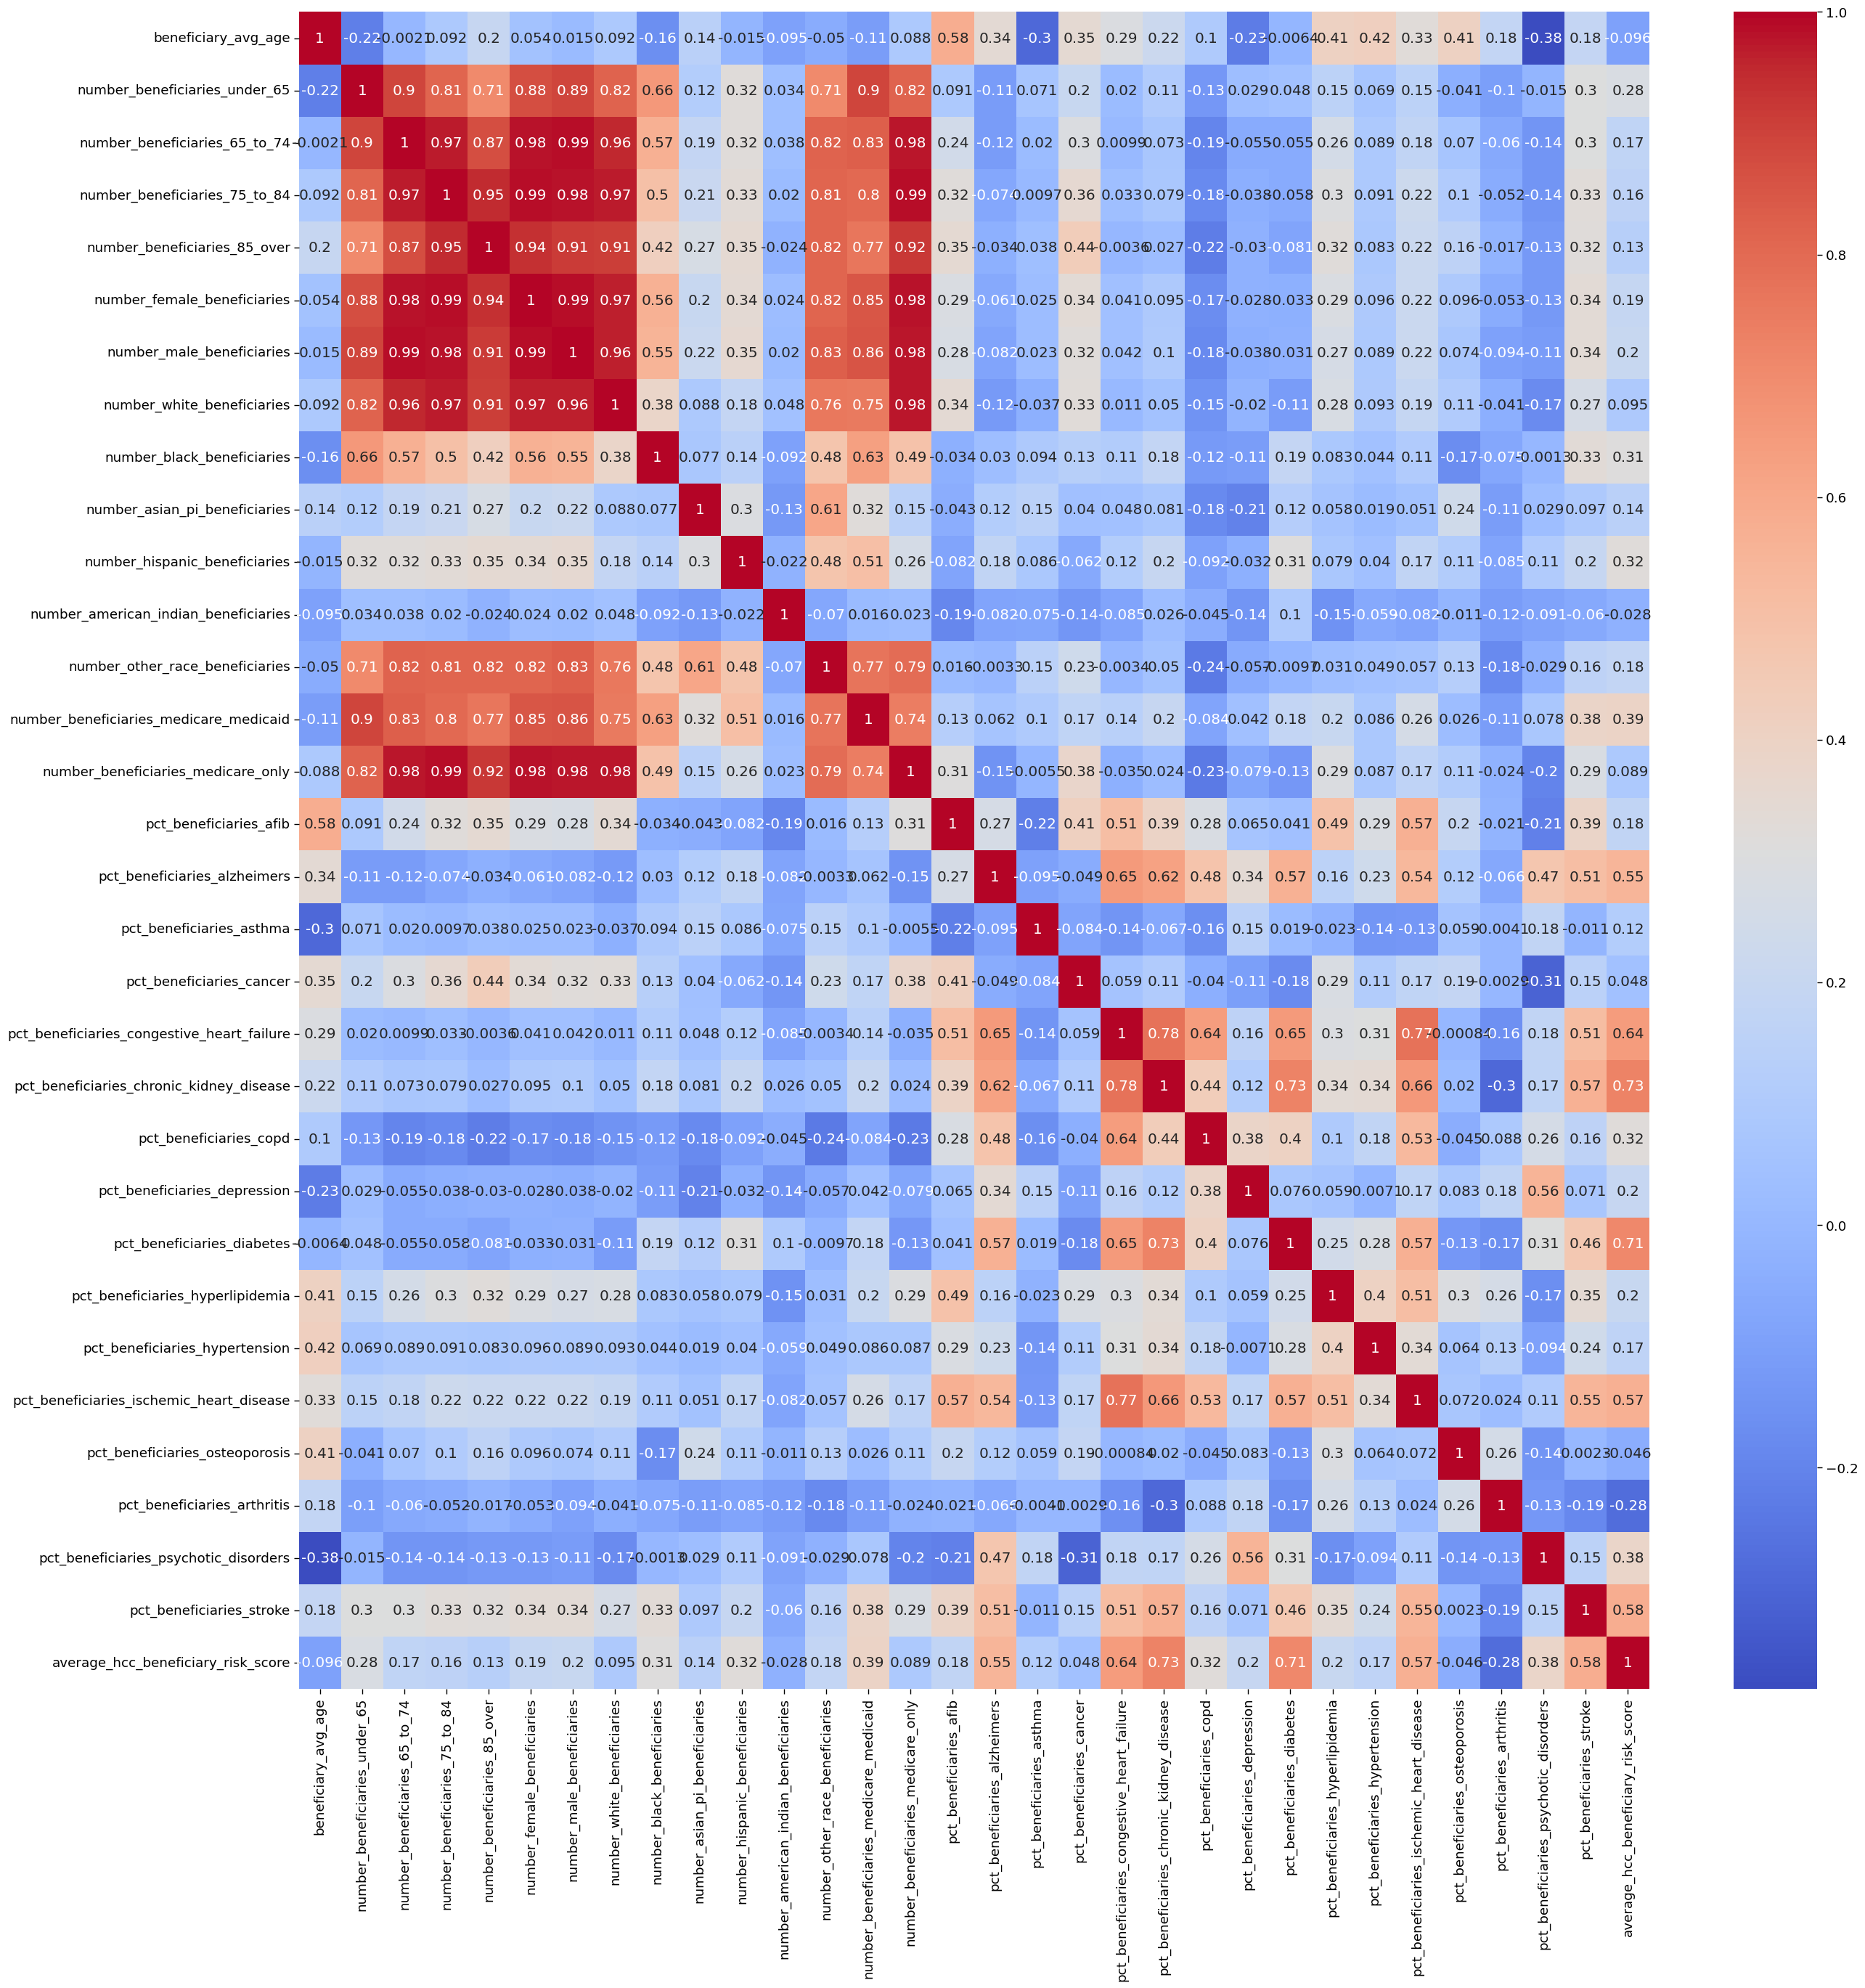

In [61]:
sns.set_context("paper", font_scale=1.5)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(pm)
pm_scaled = pd.DataFrame(numerical_features_scaled, columns=pm.columns)

fig, ax = plt.subplots(figsize=(30, 30))
correlation_mat = pm_scaled.corr()
sns.heatmap(correlation_mat, annot=True, cmap="coolwarm", ax=ax)

Interesting findings wrt varibales correlated to HCC benes score:
* pct benes with stroke
* pct benes wt psych
* pct benes with ischemic heart disease
* pct benes with diabetes
* pct benes with hf
* pct benes with chronic kidney
* pct benes with alz
* pct benes with dual 
